Part 1: Data Cleaning

In [ ]:

#Import and configure the required modules.
# Define required imports
import pandas as pd
import numpy as np
import sys
import re
# These set pandas max column and row display in the notebook
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

Read the Raw Data


We start by reading in the raw dataset, displaying the first few rows of the dataframe, and taking a look at the columns and column types present

In [5]:
%%capture
# Using pandas to read the data 
# Since the `DATE` column consists date-time information, we use Pandas parse_dates keyword for easier data processing

raw_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/fJKLoMKtgpDAl5MkA6rf2A/jfk-weather.csv", parse_dates=['DATE'])
raw_data.head()

In [6]:
raw_data.dtypes

STATION                               object
STATION_NAME                          object
ELEVATION                            float64
LATITUDE                             float64
LONGITUDE                            float64
                                      ...   
MonthlyTotalCoolingDegreeDays         object
MonthlyDeptFromNormalHeatingDD        object
MonthlyDeptFromNormalCoolingDD        object
MonthlyTotalSeasonToDateHeatingDD    float64
MonthlyTotalSeasonToDateCoolingDD    float64
Length: 90, dtype: object

Select data columns


In [ ]:
# Choose what columns to import from raw data
column_subset = [
    'DATE',
    'HOURLYVISIBILITY',
    'HOURLYDRYBULBTEMPF',
    'HOURLYWETBULBTEMPF',
    'HOURLYDewPointTempF',
    'HOURLYRelativeHumidity',
    'HOURLYWindSpeed',
    'HOURLYWindDirection',
    'HOURLYStationPressure',
    'HOURLYPressureTendency',
    'HOURLYSeaLevelPressure',
    'HOURLYPrecip',
    'HOURLYAltimeterSetting'
]

# Filter dataset to relevant columns
hourly_data = raw_data[column_subset]
# Set date index
hourly_data = hourly_data.set_index(pd.DatetimeIndex(hourly_data['DATE']))#数据通常是按时间序列记录的
hourly_data.drop(['DATE'], axis=1, inplace=True)#DATE 已经变成了索引，就没必要再作为普通列存在
hourly_data.replace(to_replace='*', value=np.nan, inplace=True)#清洗异常值
hourly_data.head()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
DATE,,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33.0,32.0,31,92.0,0.0,000,29.97,8.0,29.99,0.01,29.99
2010-01-01 01:00:00,5.59,33.0,32.0,31,92.0,0.0,000,29.96,8.0,29.99,NaN,NaN
2010-01-01 01:51:00,6.00,33.0,33.0,32,96.0,0.0,000,29.97,NaN,29.99,0.02,29.99
2010-01-01 02:03:00,6.00,34.0,33.0,32,93.0,0.0,000,29.97,NaN,NaN,T,29.99
2010-01-01 02:28:00,5.00,34.0,33.0,32,93.0,0.0,000,29.97,NaN,NaN,T,29.99


In [8]:
hourly_data.dtypes

HOURLYVISIBILITY           object
HOURLYDRYBULBTEMPF         object
HOURLYWETBULBTEMPF         object
HOURLYDewPointTempF        object
HOURLYRelativeHumidity     object
HOURLYWindSpeed            object
HOURLYWindDirection        object
HOURLYStationPressure      object
HOURLYPressureTendency    float64
HOURLYSeaLevelPressure     object
HOURLYPrecip               object
HOURLYAltimeterSetting     object
dtype: object

In [9]:
hourly_data["HOURLYPrecip"].unique()

array(['0.01', nan, '0.02', 'T', '0.00', '0.10', '0.07', '0.03', '0.05',
       '0.15', '0.06', '0.08', '0.04', '0.09', '0.11', '0.20', '0.13',
       '0.14', '0.05s', '0.12', '0.24', '0.02s', '0.17', '0.16', '0.47',
       '0.28', '0.32', '0.19', '0.22', '0.18', '0.26', '0.23', '0.30',
       '0.33', '0.04s', '0.36', '0.40', '0.41', '0.51', '0.50', '0.68s',
       '0.21', '0.35', '0.54', '0.01s', '0.34', '0.94', '1.14', '1.18',
       '1.15', '0.65', '0.74', '0.39', '0.67', '0.29', '0.46', '0.87',
       '1.10', '0.52', '0.08s', '0.37', '0.42', '0.03s', '0.09s', '0.11s',
       '0.10s', '0.25', '0.33s', '0.13s', '0.38', '0.64s', '0.06s',
       '0.17s', '0.69s', '0.73', '2.41', '0.57', '0.84', '0.86', '0.27',
       '0.60', '0.45', '0.75', '1.26', '0.59', '0.68', '0.79', '0.70',
       '0.44', '0.43', '0.53', '0.37s', '0.77', '0.85', '0.93', '0.55',
       '0.56', '1.52', '1.05', '1.76', '0.07s', '0.63', '1.19', '0.12s',
       '0.18s', '0.58', '0.48', '0.66', '0.29s', '0.71', '0.20s'

In [10]:
hourly_data["HOURLYPrecip"].replace(to_replace="T", value="0.00",inplace= True )
hourly_data["HOURLYPrecip"].replace("0.020.01s",np.nan,inplace=True )

有些s在里面不行

In [11]:
messy_columns= column_subset[1:]#日期是没有问题的！
for i  in messy_columns:
    hourly_data[i] = hourly_data[i].apply(
        lambda x: re.sub('[^0-9,.-]', '', x) if type(x) == str else x
    ).replace('', np.nan).astype(('float32'))
    #[^0-9,.-] = 匹配所有 不是 数字(0-9)、逗号(,)、点(.)、减号(-) 的字符。'' = 替换为空。
    #只有当值是字符串才用 re.sub 清理
    #如果清理之后变成了空字符串（说明原来是无效值，比如 '*'）
    #最后把整列的数据类型转换成 float32，变成真正的数值列

In [12]:
print(hourly_data.info())
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        96464 non-null   float32
 1   HOURLYDRYBULBTEMPF      111403 non-null  float32
 2   HOURLYWETBULBTEMPF      111245 non-null  float32
 3   HOURLYDewPointTempF     111395 non-null  float32
 4   HOURLYRelativeHumidity  111395 non-null  float32
 5   HOURLYWindSpeed         111358 non-null  float32
 6   HOURLYWindDirection     110444 non-null  float32
 7   HOURLYStationPressure   111256 non-null  float32
 8   HOURLYPressureTendency  48038 non-null   float32
 9   HOURLYSeaLevelPressure  99522 non-null   float32
 10  HOURLYPrecip            79762 non-null   float32
 11  HOURLYAltimeterSetting  86878 non-null   float32
dtypes: float32(12)
memory usage: 6.1 MB
None


,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
DATE,,,,,,,,,,,,
2010-01-01 00:51:00,6.00,33.0,32.0,31.0,92.0,0.0,0.0,29.969999,8.0,29.99,0.01,29.99
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,0.0,29.959999,8.0,29.99,NaN,NaN
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,NaN,29.99,0.02,29.99
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,NaN,NaN,0.00,29.99
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,NaN,NaN,0.00,29.99


finish cleaning

In [13]:
# Generate the summary statistics for each column
hourly_data.describe()

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
count,96464.000000,111403.000000,111245.000000,111395.000000,111395.000000,111358.000000,110444.000000,111256.000000,48038.000000,99522.000000,79762.000000,86878.000000
mean,8.758805,55.310612,49.703098,43.309196,67.132141,11.268045,192.511597,29.990641,4.388963,30.026194,0.007032,30.009533
std,2.742651,17.169744,16.062113,19.357059,20.278572,6.175006,107.606514,0.238452,2.741795,0.233693,0.042636,0.239821
min,0.000000,1.000000,-1.000000,-22.000000,8.000000,0.000000,0.000000,28.490000,0.000000,28.540001,0.000000,28.510000
25%,9.940000,42.000000,37.000000,29.000000,51.000000,7.000000,110.000000,29.850000,2.000000,29.879999,0.000000,29.870001
50%,10.000000,56.000000,50.000000,45.000000,69.000000,10.000000,200.000000,29.990000,5.000000,30.020000,0.000000,30.010000
75%,10.000000,70.000000,64.000000,60.000000,85.000000,15.000000,280.000000,30.139999,7.000000,30.170000,0.000000,30.160000
max,99.419998,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,8.000000,30.850000,2.410000,30.850000


In [14]:
# Check if categorical variable HOURLYPressureTendency ever has a non-integer entry outside the bounds of 0-8
cond = len(hourly_data[~hourly_data['HOURLYPressureTendency'].isin(list(range(0,9)) + [np.nan])])
print('Hourly Pressure Tendency should be between 0 and 8: {}'.format(cond == 0))

Hourly Pressure Tendency should be between 0 and 8: True


range(0,9)
生成 [0,1,2,3,4,5,6,7,8]
根据文档，HOURLYPressureTendency 的取值范围就是 0 到 8。
.isin(list(range(0,9)) + [np.nan])
检查每个值是不是在 [0–8 或 NaN] 这个集合里。
返回一个布尔数组（True/False）。
~
取反：把“不在范围内”的值标记出来。
hourly_data[...]
筛选出那些“不在范围内”的行。
len(...)
统计有多少行值不合法。

如果 cond == 0（说明没有不合法的值），就打印 True；
如果有不合法的值，就会打印 False

In [15]:

# Hourly Visibility should be between 0 and 10
hourly_data[(hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)]

,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
DATE,,,,,,,,,,,,
2011-10-16 11:51:00,14.000000,68.0,53.0,37.0,33.0,16.0,250.0,29.85,NaN,NaN,NaN,29.870001
2015-06-21 17:45:00,99.419998,79.0,72.0,68.0,70.0,37.0,310.0,29.74,NaN,NaN,0.0,29.760000


We find that a couple of observations fall outside the range. These must be spurious data observations and we handle them by replacing them with NaN.

In [16]:
# Replace any hourly visibility figure outside these bounds with nan
hourly_data.loc[hourly_data['HOURLYVISIBILITY'] > 10, 'HOURLYVISIBILITY'] = np.nan

# Hourly Visibility should be between 0 and 10
cond = len(hourly_data[(hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)])
print('Hourly Visibility should be between 0 and 10: {}'.format(cond == 0))

Hourly Visibility should be between 0 and 10: True


In [17]:
cond = len(hourly_data[hourly_data.index.duplicated()].sort_index())
print('Date index contains no duplicate entries: {}'.format(cond == 0))

Date index contains no duplicate entries: True


In [18]:
# Make sure time index is sorted and increasing
print('Date index is strictly increasing: {}'.format(hourly_data.index.is_monotonic_increasing))

Date index is strictly increasing: True


In [19]:
hourly_data.reset_index(inplace=True)

In [20]:
hourly_data.columns

Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting'],
      dtype='object')

We will now also replace missing values. For numerical values, we will linearly interpolate between the previous and next valid obvservations. For the categorical HOURLYPressureTendency field, we will replace missing values with the last valid observation.

In [21]:
%%capture
hourly_data['HOURLYPressureTendency'] = hourly_data['HOURLYPressureTendency'].fillna(method='ffill') # fill with last valid observation
hourly_data = hourly_data.interpolate(method='linear') # interpolate missing values
hourly_data.drop(hourly_data.index[0], inplace=True) # drop first row

In [22]:
print(hourly_data.info())
print()
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114544 entries, 1 to 114544
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    114544 non-null  datetime64[ns]
 1   HOURLYVISIBILITY        114544 non-null  float32       
 2   HOURLYDRYBULBTEMPF      114544 non-null  float32       
 3   HOURLYWETBULBTEMPF      114544 non-null  float32       
 4   HOURLYDewPointTempF     114544 non-null  float32       
 5   HOURLYRelativeHumidity  114544 non-null  float32       
 6   HOURLYWindSpeed         114544 non-null  float32       
 7   HOURLYWindDirection     114544 non-null  float32       
 8   HOURLYStationPressure   114544 non-null  float32       
 9   HOURLYPressureTendency  114544 non-null  float32       
 10  HOURLYSeaLevelPressure  114544 non-null  float32       
 11  HOURLYPrecip            114544 non-null  float32       
 12  HOURLYAltimeterSetting  114544

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPressureTendency,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting
1,2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,0.0,29.959999,8.0,29.99,0.015,29.99
2,2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,8.0,29.99,0.020,29.99
3,2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,8.0,29.99,0.000,29.99
4,2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,0.0,29.969999,8.0,29.99,0.000,29.99
5,2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,0.0,29.969999,8.0,29.99,0.000,29.99


Feature encoding：有些原始数据（风向、气压趋势）如果直接用原始数值训练模型，会导致模型“误解”这些数据，所以要转成更合理的形式。

HOURLYWindDirection：风向是一个 循环变量：0° 和 360° 其实是同一个方向。
HOURLYPressureTendency：用 dummy 变量表达，避免模型误解数值顺序。

In [23]:
# Transform HOURLYWindDirection into a cyclical variable using sin and cos transforms
hourly_data['HOURLYWindDirectionSin'] = np.sin(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data['HOURLYWindDirectionCos'] = np.cos(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data.drop(['HOURLYWindDirection'], axis=1, inplace=True)

In [24]:
# Transform HOURLYPressureTendency into 3 dummy variables based on NOAA documentation
hourly_data['HOURLYPressureTendencyIncr'] = [1.0 if x in [0,1,2,3] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 0 through 3 indicates an increase in pressure over previous 3 hours
hourly_data['HOURLYPressureTendencyDecr'] = [1.0 if x in [5,6,7,8] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 5 through 8 indicates a decrease over previous 3 hours
hourly_data['HOURLYPressureTendencyConst'] = [1.0 if x == 4 else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 4 indicates no change during previous 3 hours
hourly_data.drop(['HOURLYPressureTendency'], axis=1, inplace=True)
hourly_data['HOURLYPressureTendencyIncr'] = hourly_data['HOURLYPressureTendencyIncr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyDecr'] = hourly_data['HOURLYPressureTendencyDecr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyConst'] = hourly_data['HOURLYPressureTendencyConst'].astype(('float32'))

Rename columns
Before saving the dataset, we will rename the columns for readability.

In [25]:
hourly_data.columns

Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYStationPressure', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting', 'HOURLYWindDirectionSin',
       'HOURLYWindDirectionCos', 'HOURLYPressureTendencyIncr',
       'HOURLYPressureTendencyDecr', 'HOURLYPressureTendencyConst'],
      dtype='object')

In [26]:
# define the new column names
columns_new_name = [
    'DATE',
    'visibility',
    'dry_bulb_temp_f',
    'wet_bulb_temp_f',
    'dew_point_temp_f',
    'relative_humidity',
    'wind_speed',
    'station_pressure',
    'sea_level_pressure',
    'precip',
    'altimeter_setting',
    'wind_direction_sin',
    'wind_direction_cos',
    'pressure_tendency_incr',
    'pressure_tendency_decr',
    'pressure_tendency_const'
]

columns_name_map = {c:columns_new_name[i] for i, c in enumerate(hourly_data.columns)}

hourly_data_renamed = hourly_data.rename(columns=columns_name_map)

In [27]:
print(hourly_data_renamed.info())
print()
hourly_data_renamed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114544 entries, 1 to 114544
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DATE                     114544 non-null  datetime64[ns]
 1   visibility               114544 non-null  float32       
 2   dry_bulb_temp_f          114544 non-null  float32       
 3   wet_bulb_temp_f          114544 non-null  float32       
 4   dew_point_temp_f         114544 non-null  float32       
 5   relative_humidity        114544 non-null  float32       
 6   wind_speed               114544 non-null  float32       
 7   station_pressure         114544 non-null  float32       
 8   sea_level_pressure       114544 non-null  float32       
 9   precip                   114544 non-null  float32       
 10  altimeter_setting        114544 non-null  float32       
 11  wind_direction_sin       114544 non-null  float32       
 12  wind_direction_c

,DATE,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
1,2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.959999,29.99,0.015,29.99,0.0,1.0,0.0,1.0,0.0
2,2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.969999,29.99,0.020,29.99,0.0,1.0,0.0,1.0,0.0
3,2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.969999,29.99,0.000,29.99,0.0,1.0,0.0,1.0,0.0
4,2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.969999,29.99,0.000,29.99,0.0,1.0,0.0,1.0,0.0
5,2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,29.969999,29.99,0.000,29.99,0.0,1.0,0.0,1.0,0.0


In [28]:
hourly_data_renamed['DATE'] = pd.to_datetime(hourly_data_renamed['DATE'])
hourly_data_renamed.set_index('DATE', inplace=True)

In [29]:
# Explore some general information about the dataset
print('# of megabytes held by dataframe: ' + str(round(sys.getsizeof(hourly_data_renamed) / 1000000,2)))
print('# of features: ' + str(hourly_data_renamed.shape[1])) 
print('# of observations: ' + str(hourly_data_renamed.shape[0]))
print('Start date: ' + str(hourly_data_renamed.index[0]))
print('End date: ' + str(hourly_data_renamed.index[-1]))
print('# of days: ' + str((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days))
print('# of months: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/30,2)))
print('# of years: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/365,2)))

# of megabytes held by dataframe: 7.79
# of features: 15
# of observations: 114544
Start date: 2010-01-01 01:00:00
End date: 2018-07-27 23:59:00
# of days: 3129
# of months: 104.3
# of years: 8.57


Save the Cleaned Data
Finally, we save the cleaned dataset.

In [30]:
hourly_data_renamed.to_csv("jfk_weather_cleaned.csv", float_format='%g')

In [31]:
hourly_data_renamed

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
DATE,,,,,,,,,,,,,,,
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.959999,29.990000,0.015,29.990000,0.000000,1.000000,0.0,1.0,0.0
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.969999,29.990000,0.020,29.990000,0.000000,1.000000,0.0,1.0,0.0
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.969999,29.990000,0.000,29.990000,0.000000,1.000000,0.0,1.0,0.0
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.969999,29.990000,0.000,29.990000,0.000000,1.000000,0.0,1.0,0.0
2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,29.969999,29.990000,0.000,29.990000,0.000000,1.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-27 20:26:00,10.00,70.0,69.0,69.0,97.0,5.0,30.000000,30.025002,0.585,30.020000,0.984808,0.173648,1.0,0.0,0.0
2018-07-27 20:51:00,10.00,71.0,70.0,70.0,96.0,0.0,30.020000,30.040001,0.010,30.040001,0.000000,1.000000,1.0,0.0,0.0
2018-07-27 21:51:00,10.00,72.0,71.0,70.0,94.0,5.0,30.000000,30.020000,0.000,30.020000,0.766044,0.642788,1.0,0.0,0.0


Part 2: Exploratory Data Analysis (EDA)

In [33]:
import seaborn as sns
from pandas import DataFrame as df
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 160

In [34]:
data = pd.read_csv("jfk_weather_cleaned.csv")

In [35]:
data.head()

,DATE,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
0,2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.96,29.99,0.015,29.99,0.0,1.0,0,1,0
1,2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.020,29.99,0.0,1.0,0,1,0
2,2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0
3,2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0
4,2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0


In [36]:
data = pd.read_csv("jfk_weather_cleaned.csv", parse_dates=['DATE'])
# Set date index
data = data.set_index(pd.DatetimeIndex(data['DATE']))
data.drop(['DATE'], axis=1, inplace=True)
data.head()

,visibility,dry_bulb_temp_f,wet_bulb_temp_f,dew_point_temp_f,relative_humidity,wind_speed,station_pressure,sea_level_pressure,precip,altimeter_setting,wind_direction_sin,wind_direction_cos,pressure_tendency_incr,pressure_tendency_decr,pressure_tendency_const
DATE,,,,,,,,,,,,,,,
2010-01-01 01:00:00,5.59,33.0,32.0,31.0,92.0,0.0,29.96,29.99,0.015,29.99,0.0,1.0,0,1,0
2010-01-01 01:51:00,6.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.020,29.99,0.0,1.0,0,1,0
2010-01-01 02:03:00,6.00,34.0,33.0,32.0,93.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0
2010-01-01 02:28:00,5.00,34.0,33.0,32.0,93.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0
2010-01-01 02:51:00,5.00,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.000,29.99,0.0,1.0,0,1,0


Visualize the Data

In [37]:
# Columns to visualize
plot_cols = ['dry_bulb_temp_f', 'relative_humidity', 'wind_speed', 'station_pressure', 'precip']

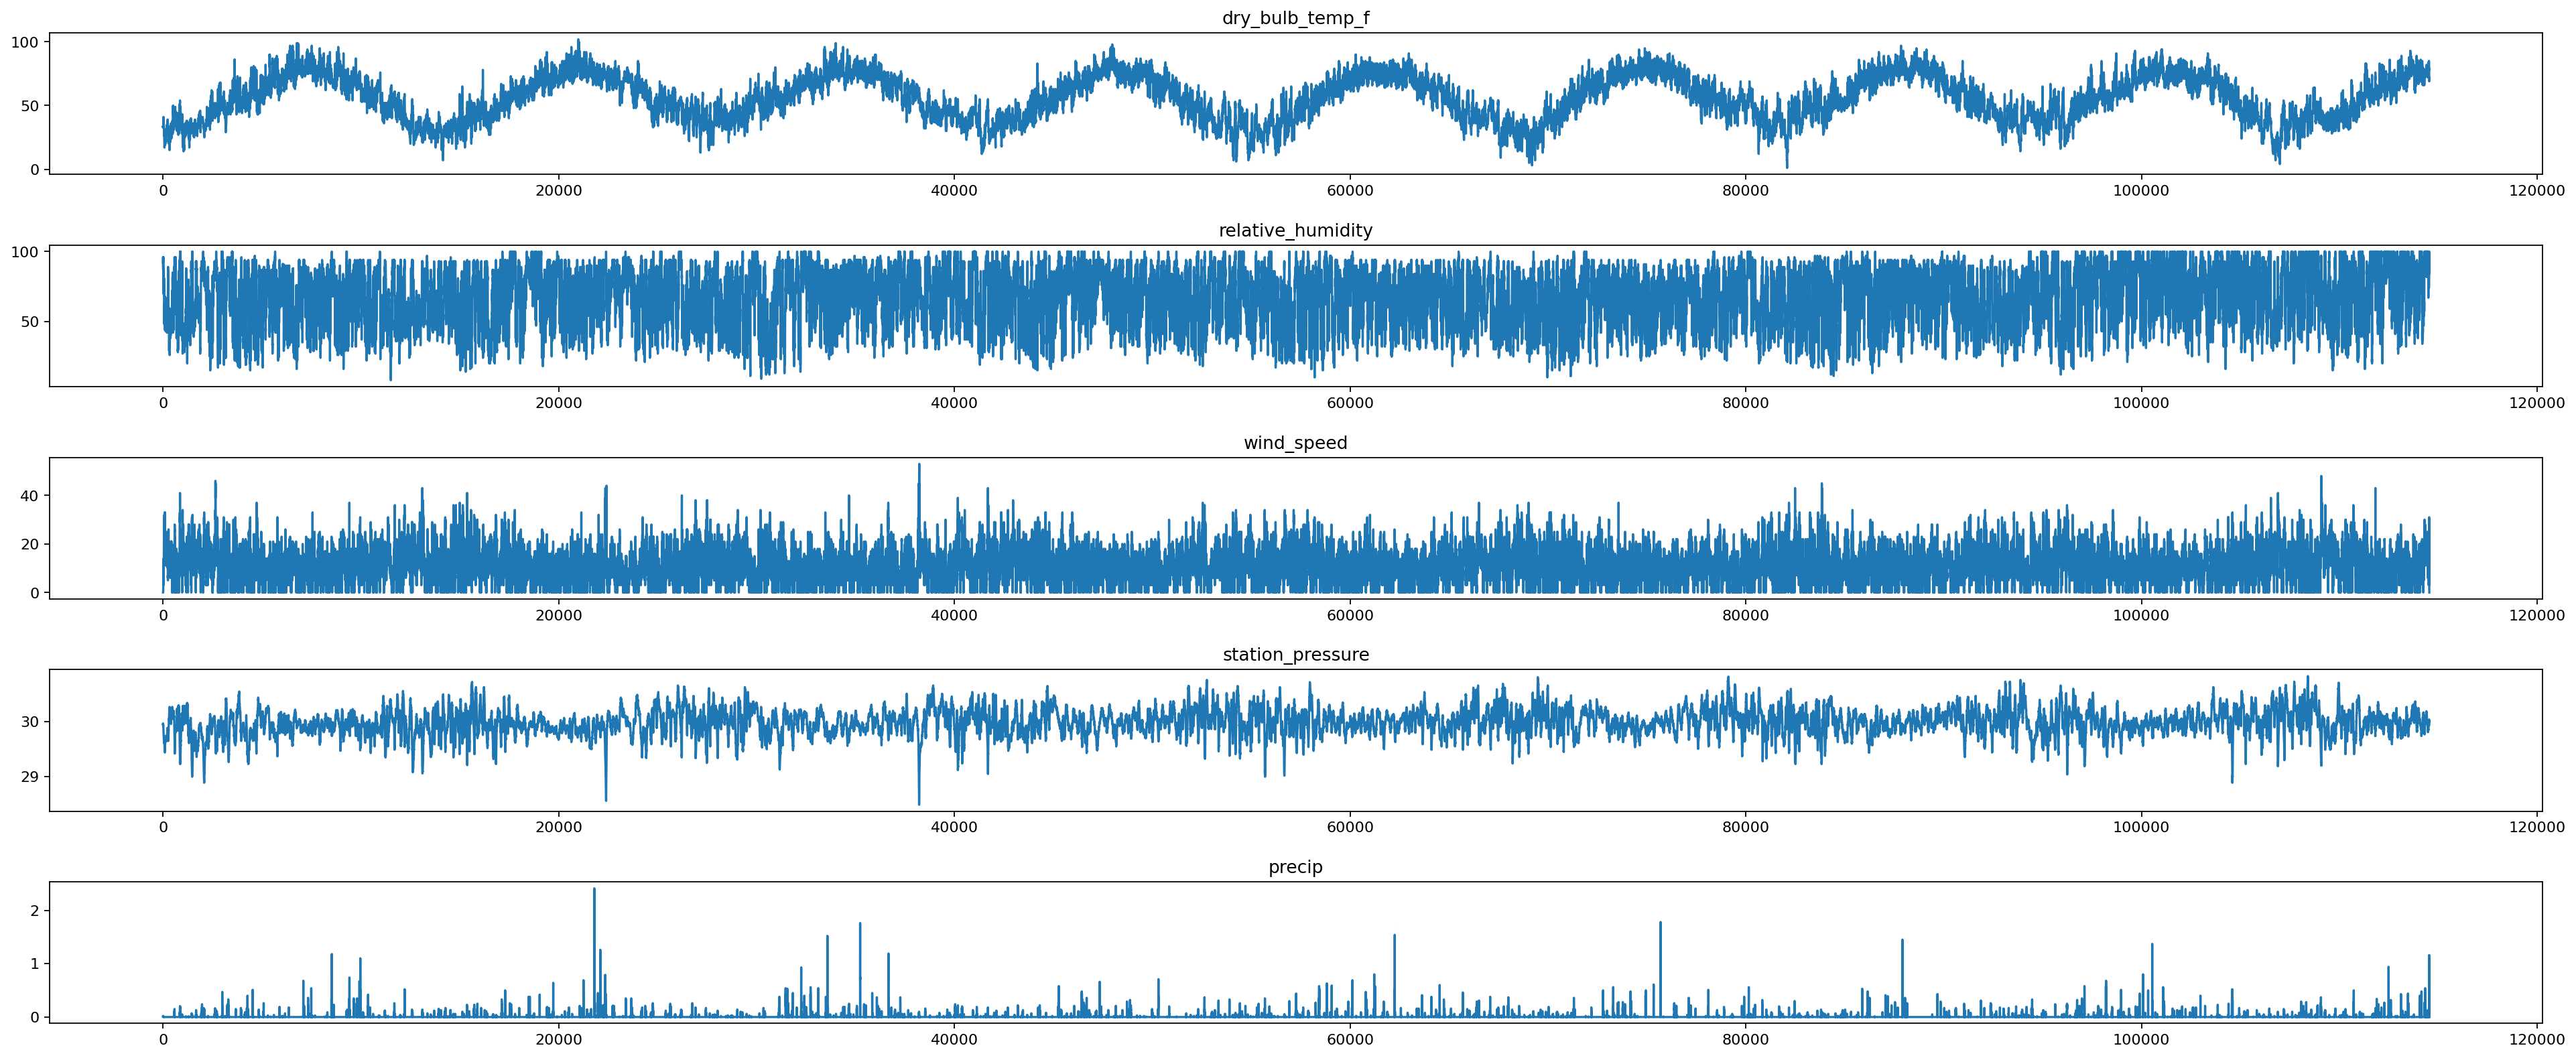

In [ ]:
# Quick overview of columns
plt.figure(figsize=(30, 12))#plt.figure(figsize=(30, 12))
i = 1
for col in plot_cols:
    plt.subplot(len(plot_cols), 1, i)
    plt.plot(data[col].values)
    plt.title(col)
    i += 1
plt.subplots_adjust(hspace=0.5)
plt.show()

这段代码就是在做 EDA（探索性数据分析） 的快速可视化：：\\\\\
哪些特征随时间有明显趋势；
有没有缺失值（表现为断线/空白）；
有没有异常点（突变/极值）

相关性矩阵热力图 (Correlation Heatmap)

👉 用来显示 每个特征两两之间的线性相关性，数值范围 -1 ~ +1。
1：完全正相关
-1：完全负相关
0：无线性相关

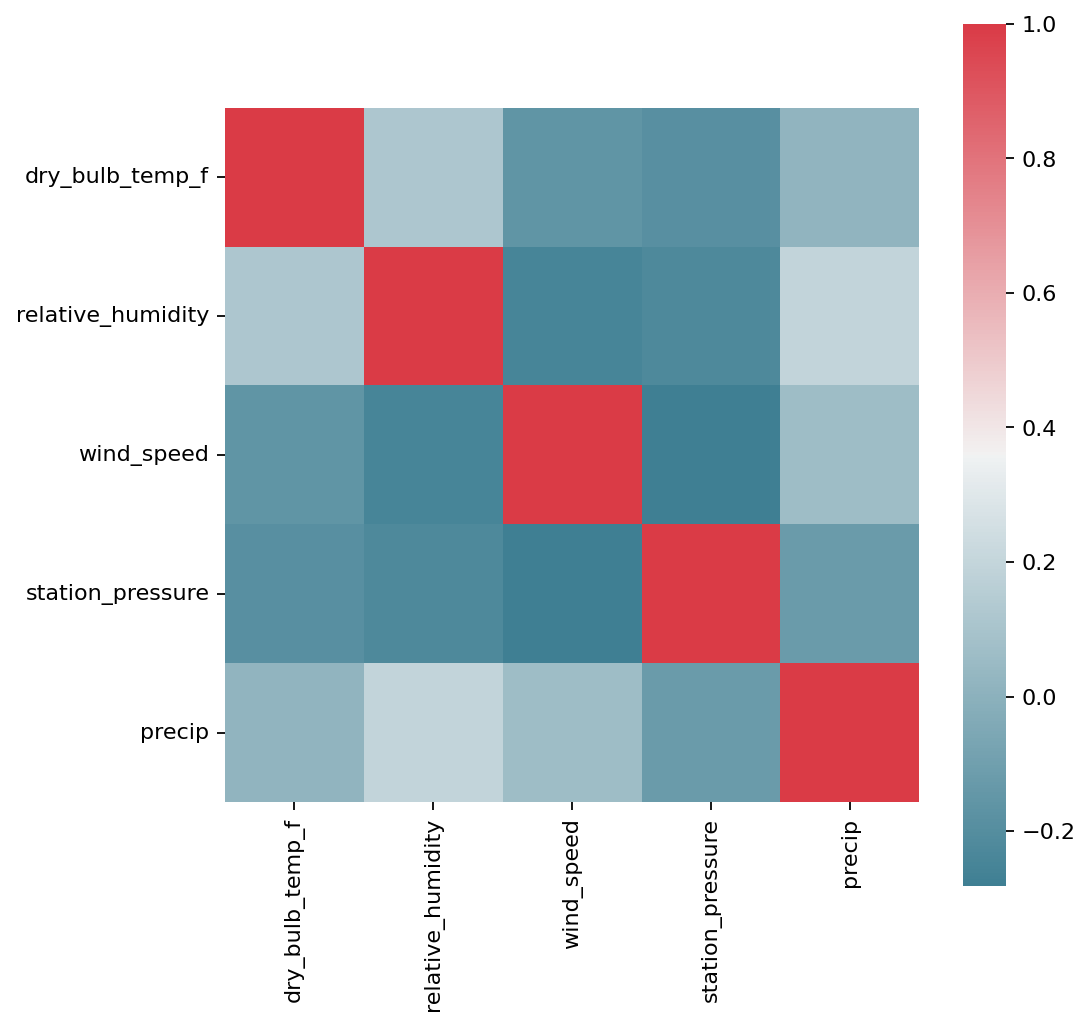

In [39]:
# Plot correlation matrix
f, ax = plt.subplots(figsize=(7, 7))
corr = data[plot_cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);

. Pairplot (成对关系图)
会生成一个大图，每两个特征都会画一个 散点图 (scatter plot)，对角线位置是每个特征的 直方图。

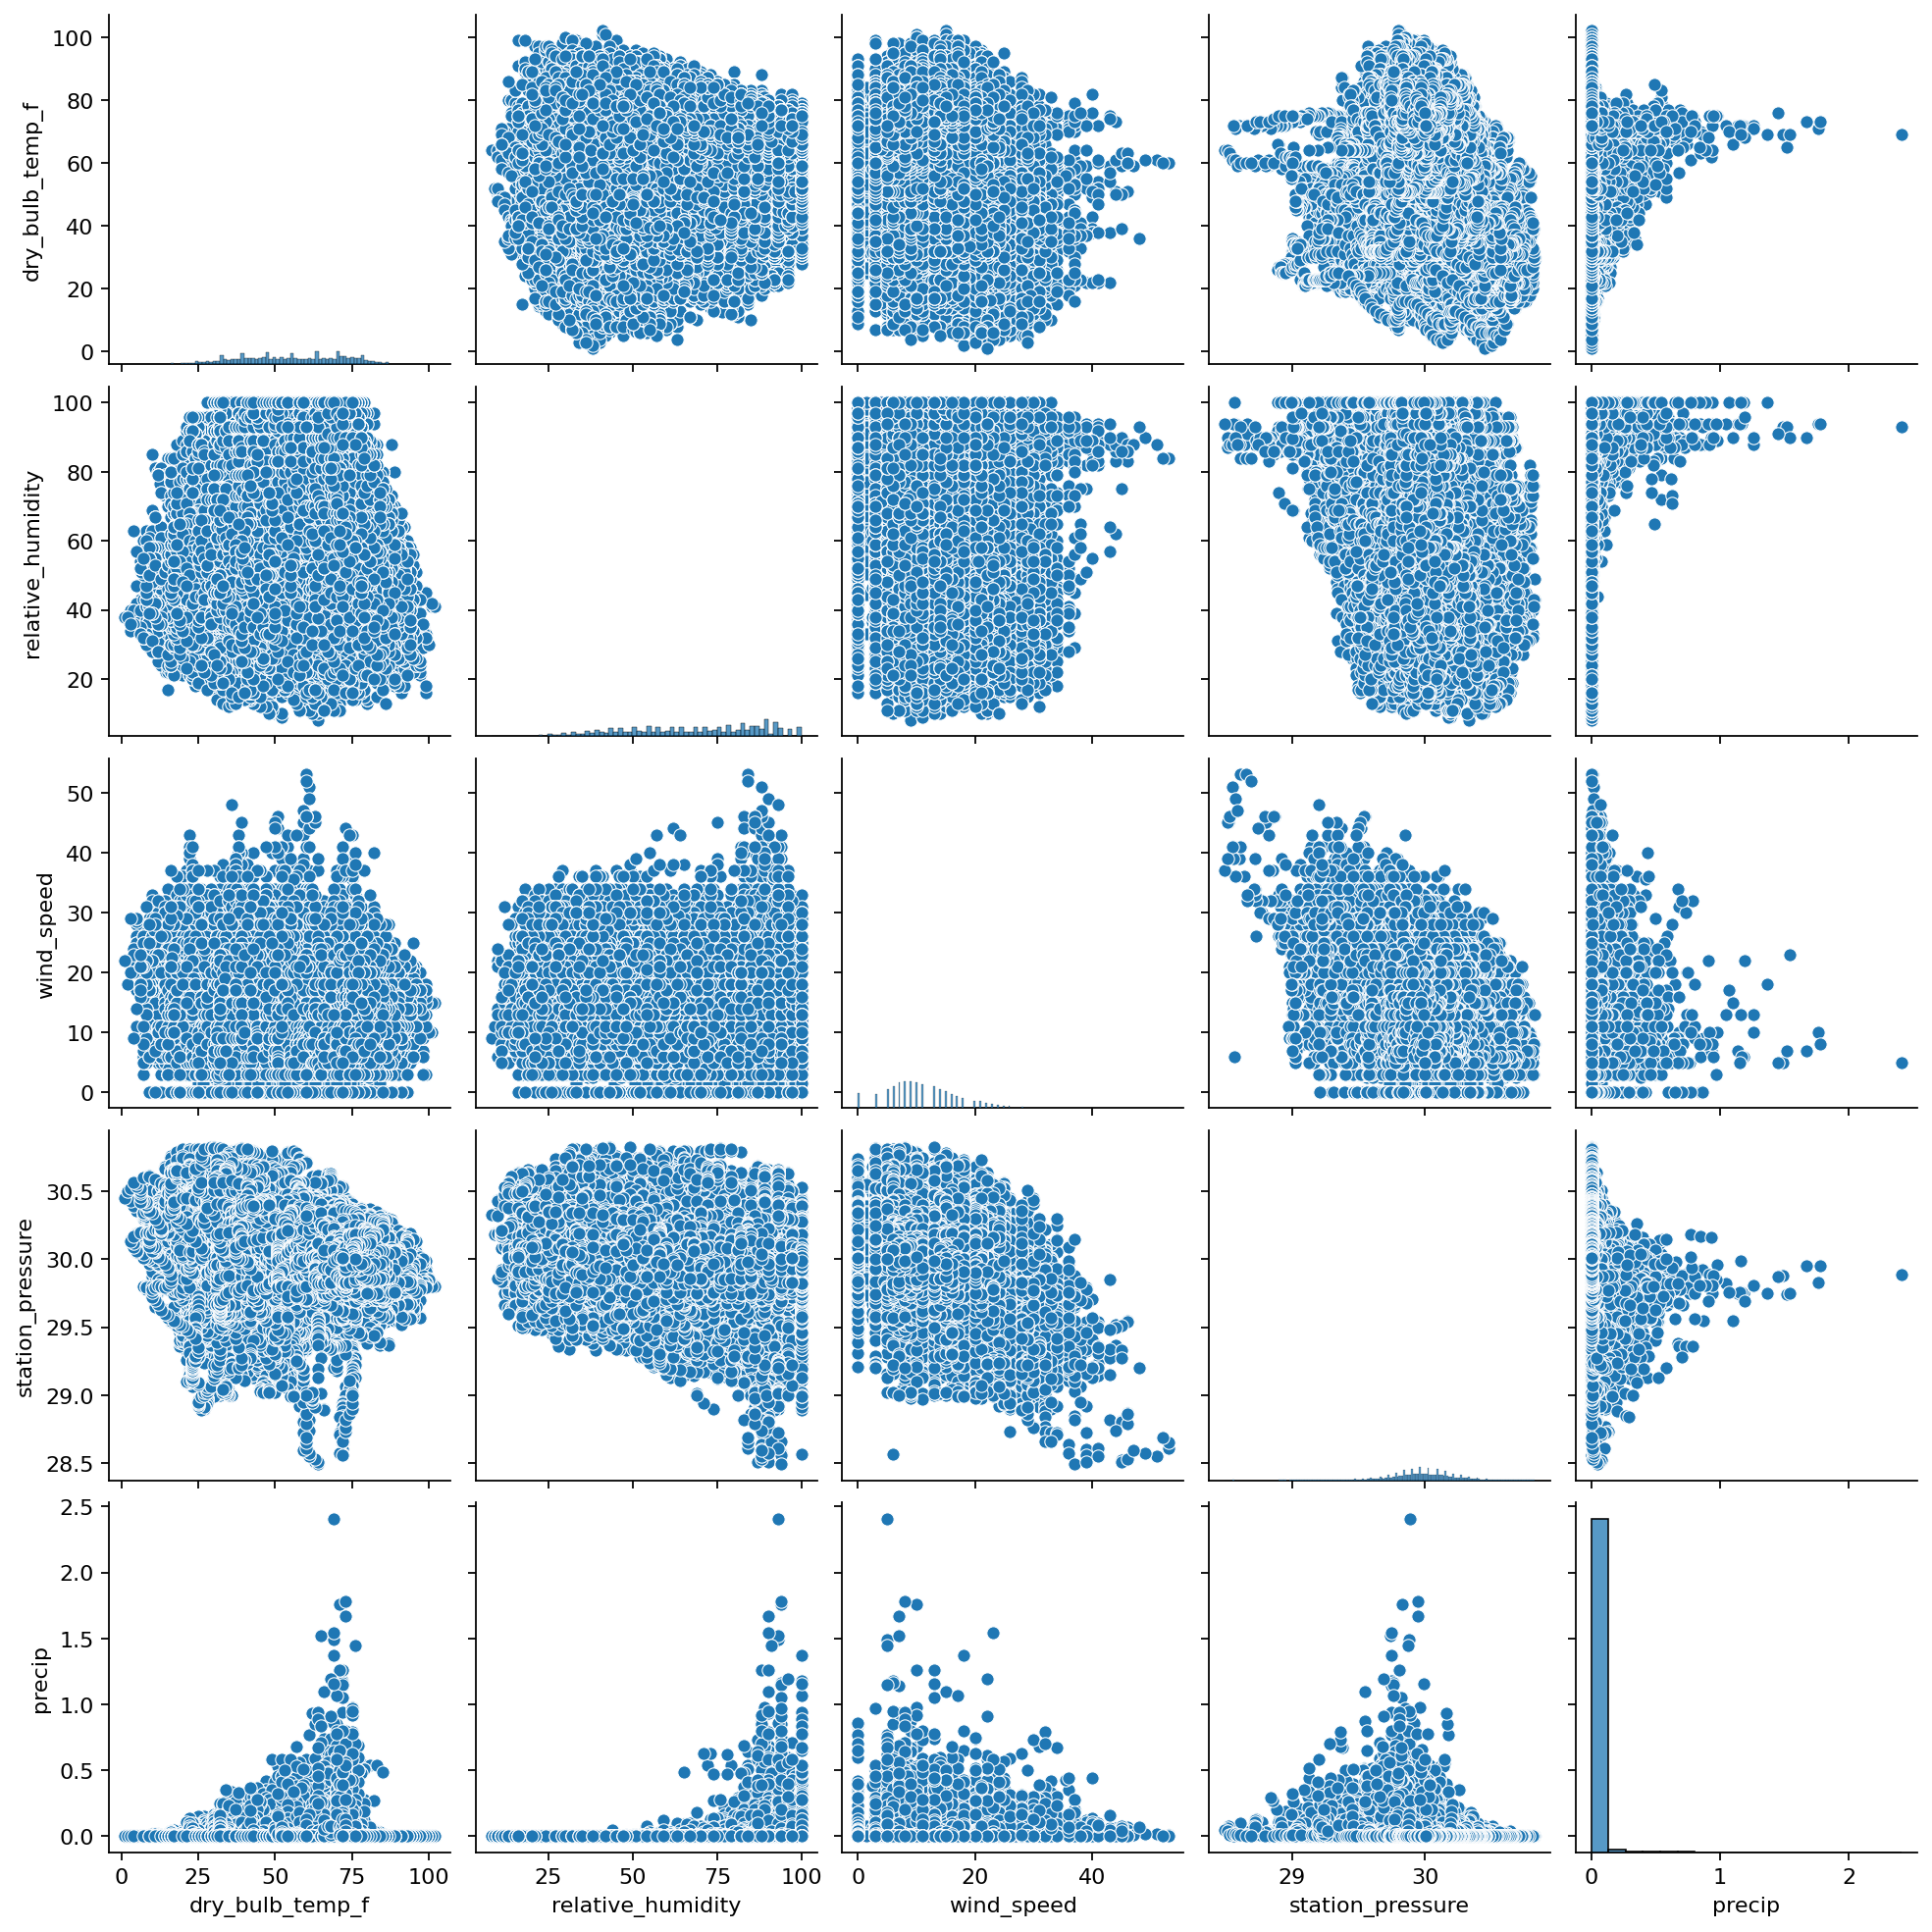

In [40]:
# Plot pairplots
sns.pairplot(data[plot_cols])

Analyze Trends in the Data

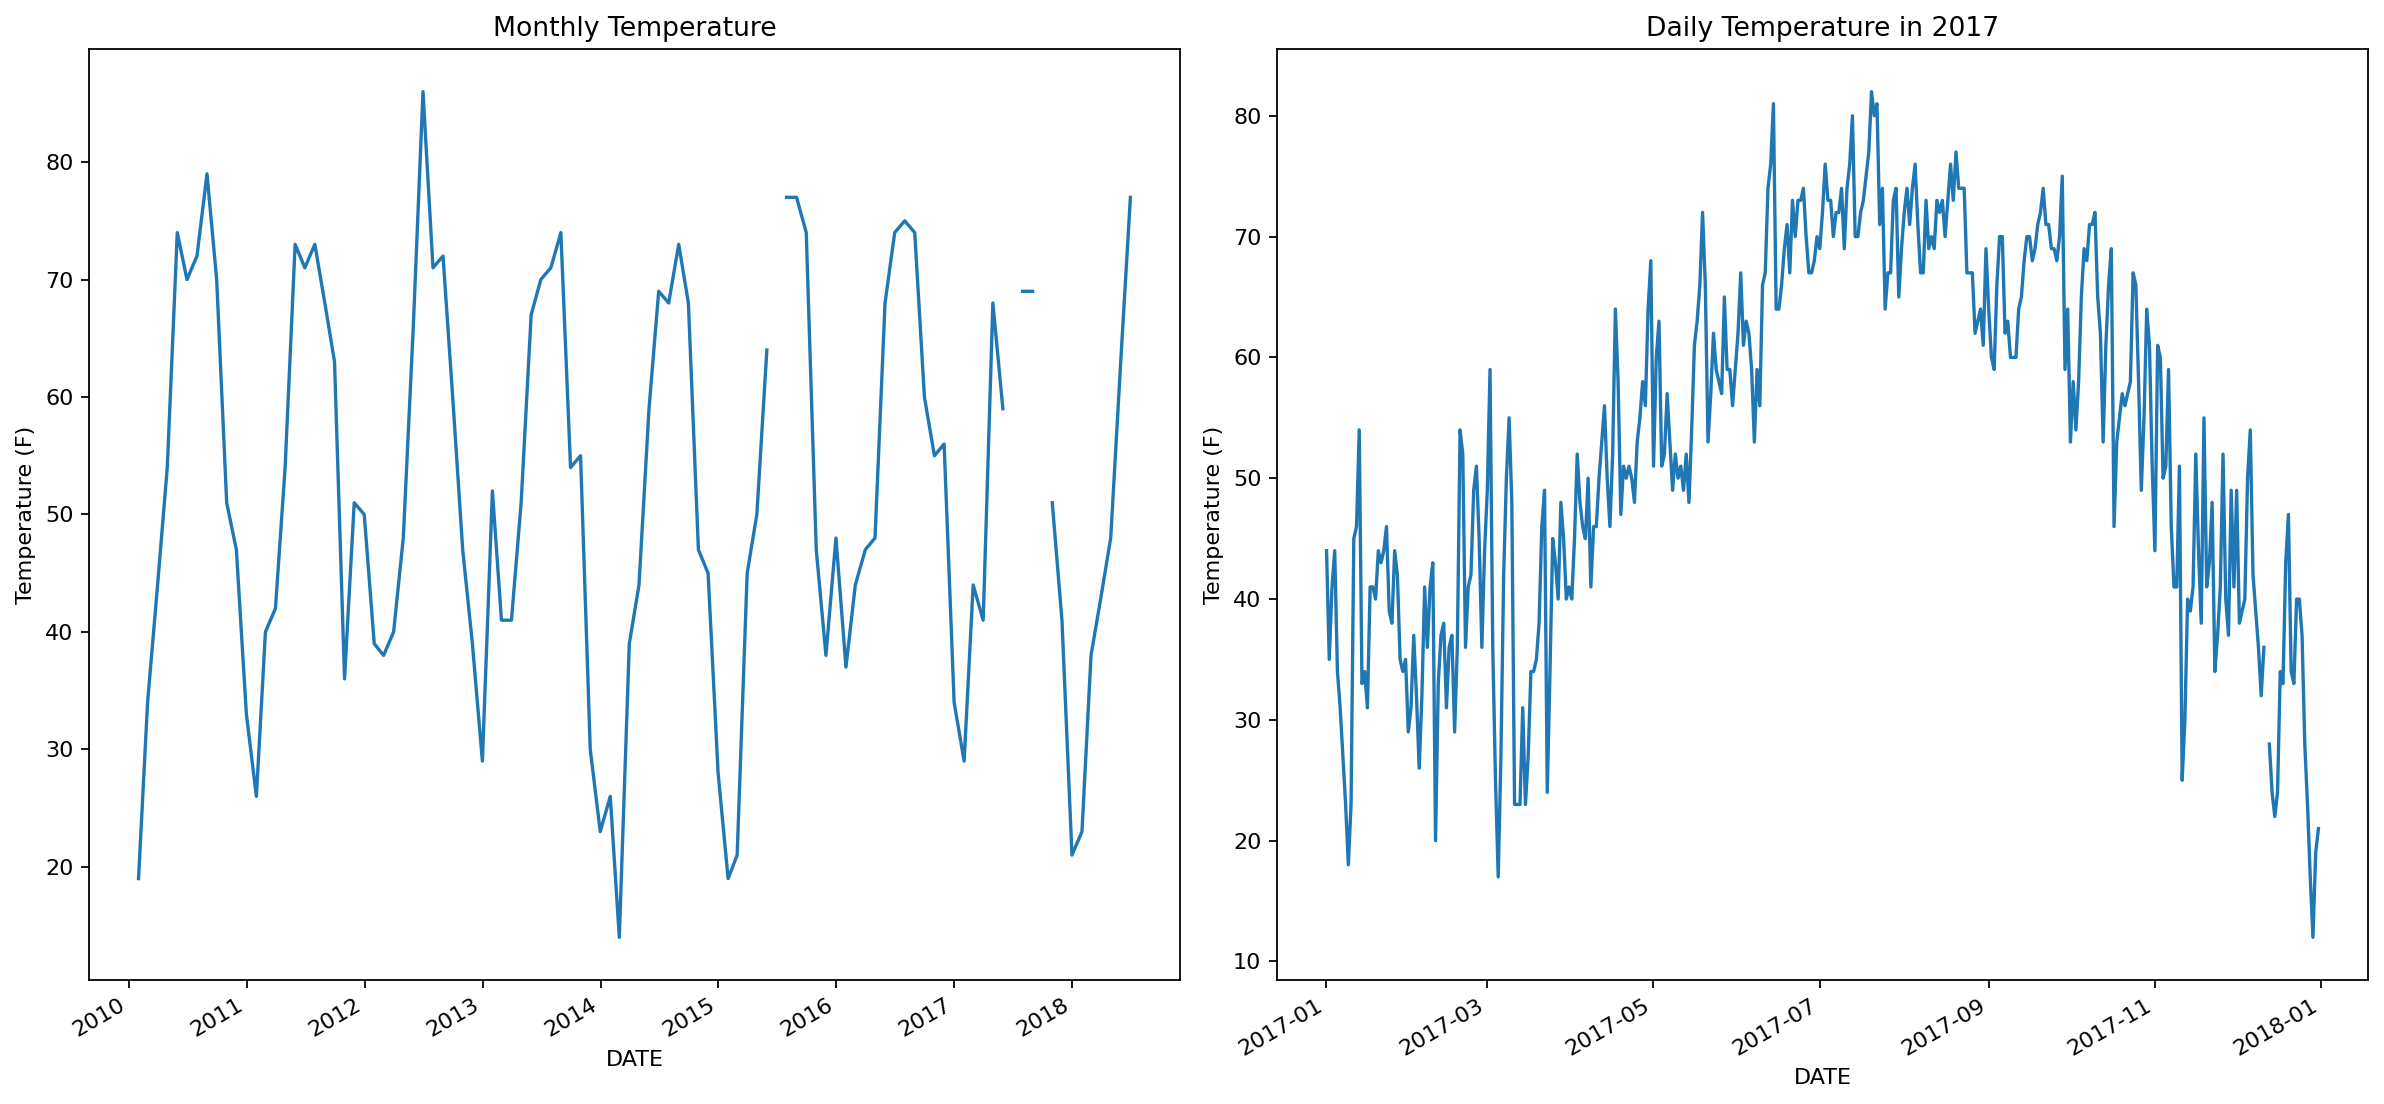

In [41]:
plt.figure(figsize=(15,7))

TEMP_COL = 'dry_bulb_temp_f'
# Plot temperature data converted to a monthly frequency 
plt.subplot(1, 2, 1)
#data = data[~data.index.duplicated(keep='first')]
data[TEMP_COL].asfreq('ME').plot()  
plt.title('Monthly Temperature')
plt.ylabel('Temperature (F)')

# Zoom in on a year and plot temperature data converted to a daily frequency 
plt.subplot(1, 2, 2)
data.loc['2017', TEMP_COL].asfreq('D').plot()
plt.title('Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

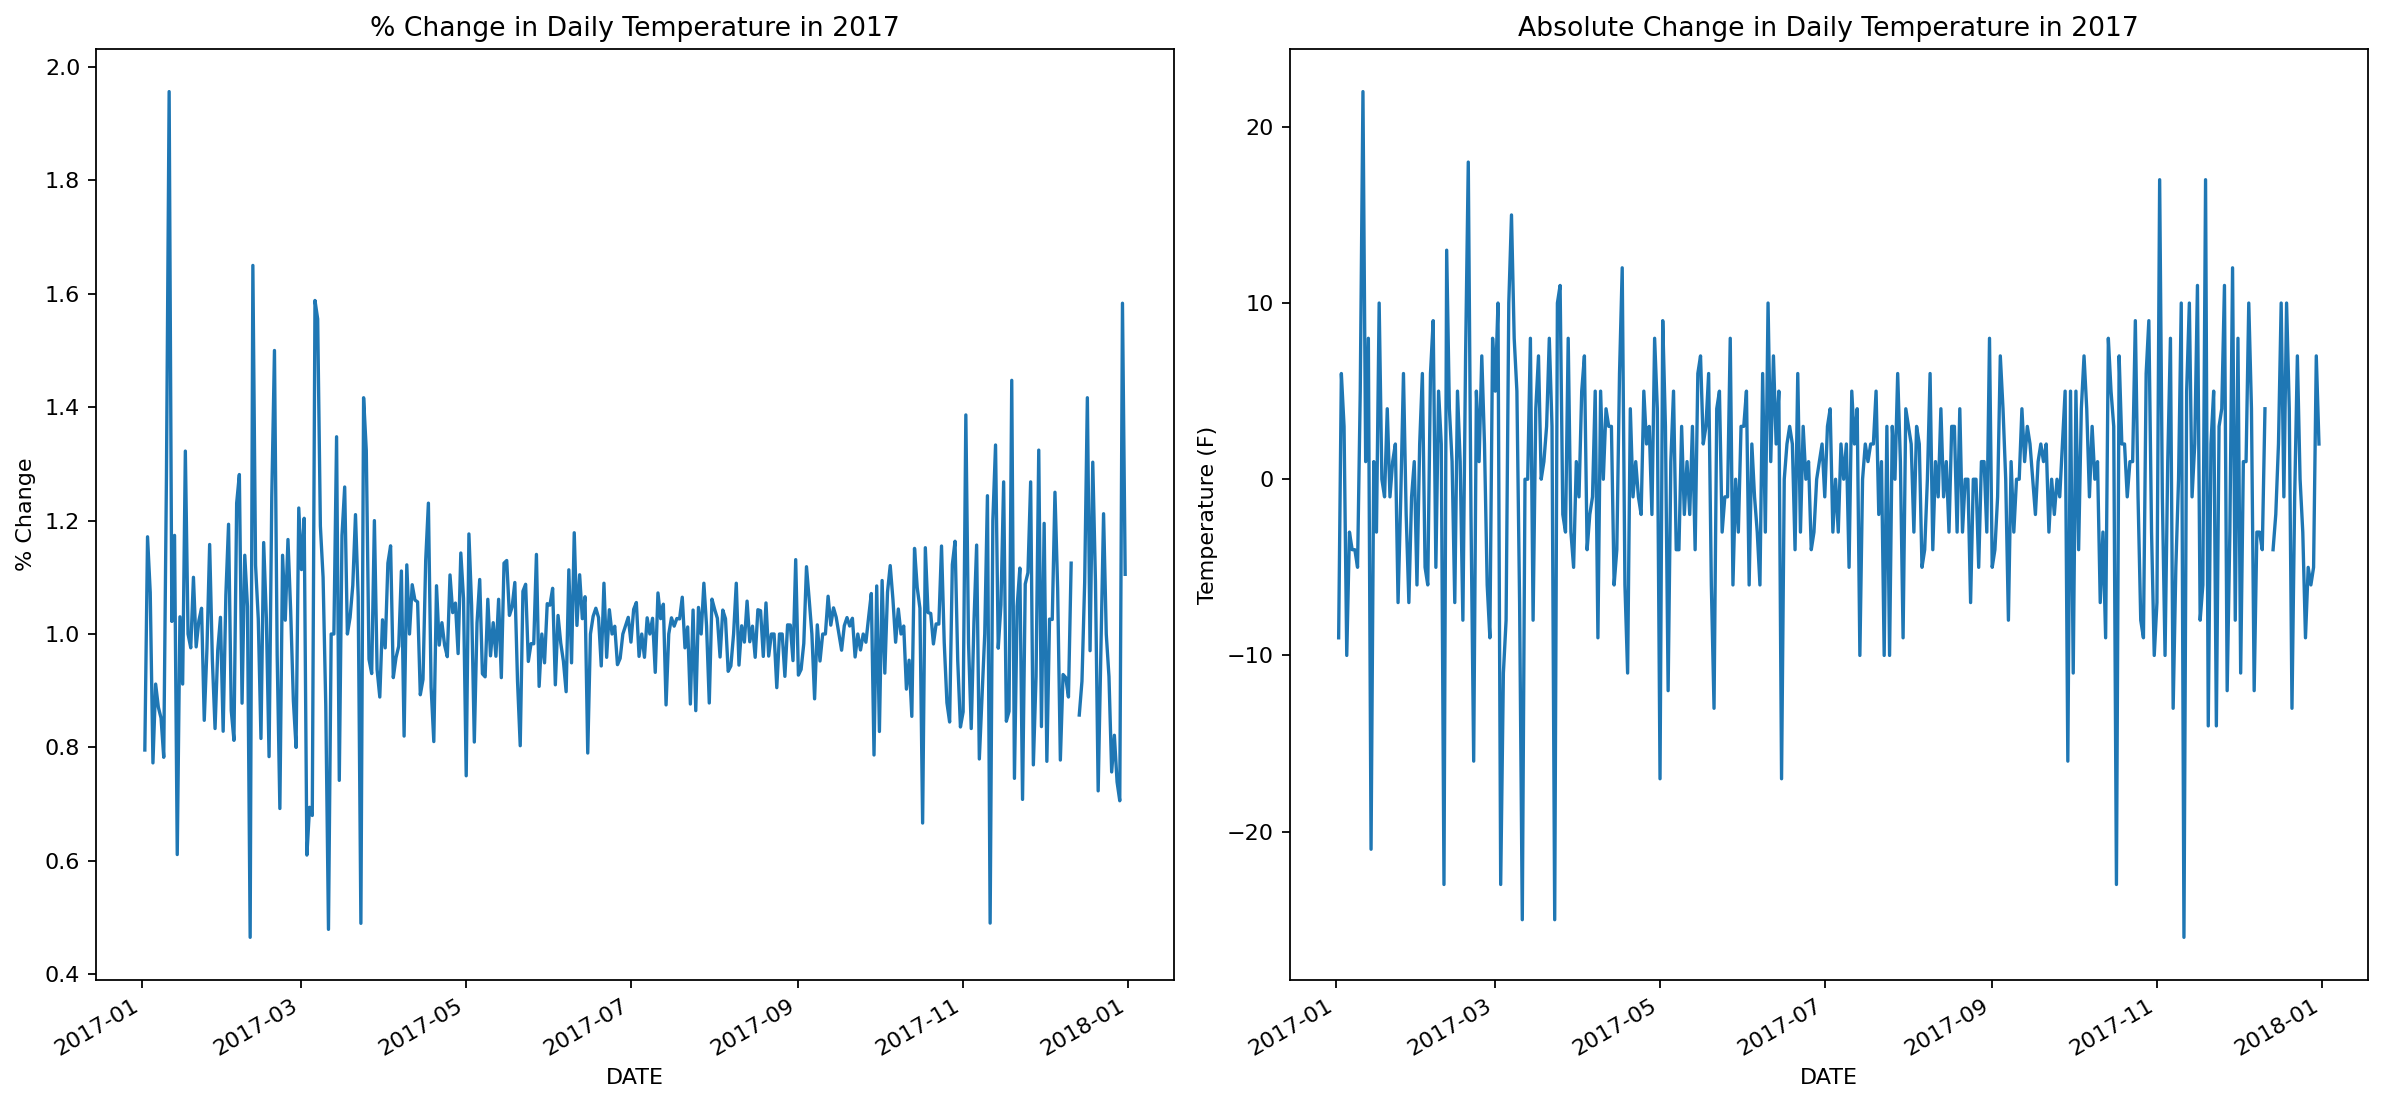

In [42]:
plt.figure(figsize=(15,7))

# Plot percent change of daily temperature in 2017
plt.subplot(1, 2, 1)
data.loc['2017', TEMP_COL].asfreq('D').div(
    data.loc['2017', TEMP_COL].asfreq('D').shift()
).plot()
plt.title('% Change in Daily Temperature in 2017')
plt.ylabel('% Change')

# Plot absolute change of temperature in 2017 with daily frequency
plt.subplot(1, 2, 2)

data.loc['2017', TEMP_COL].asfreq('D').diff().plot()

plt.title('Absolute Change in Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

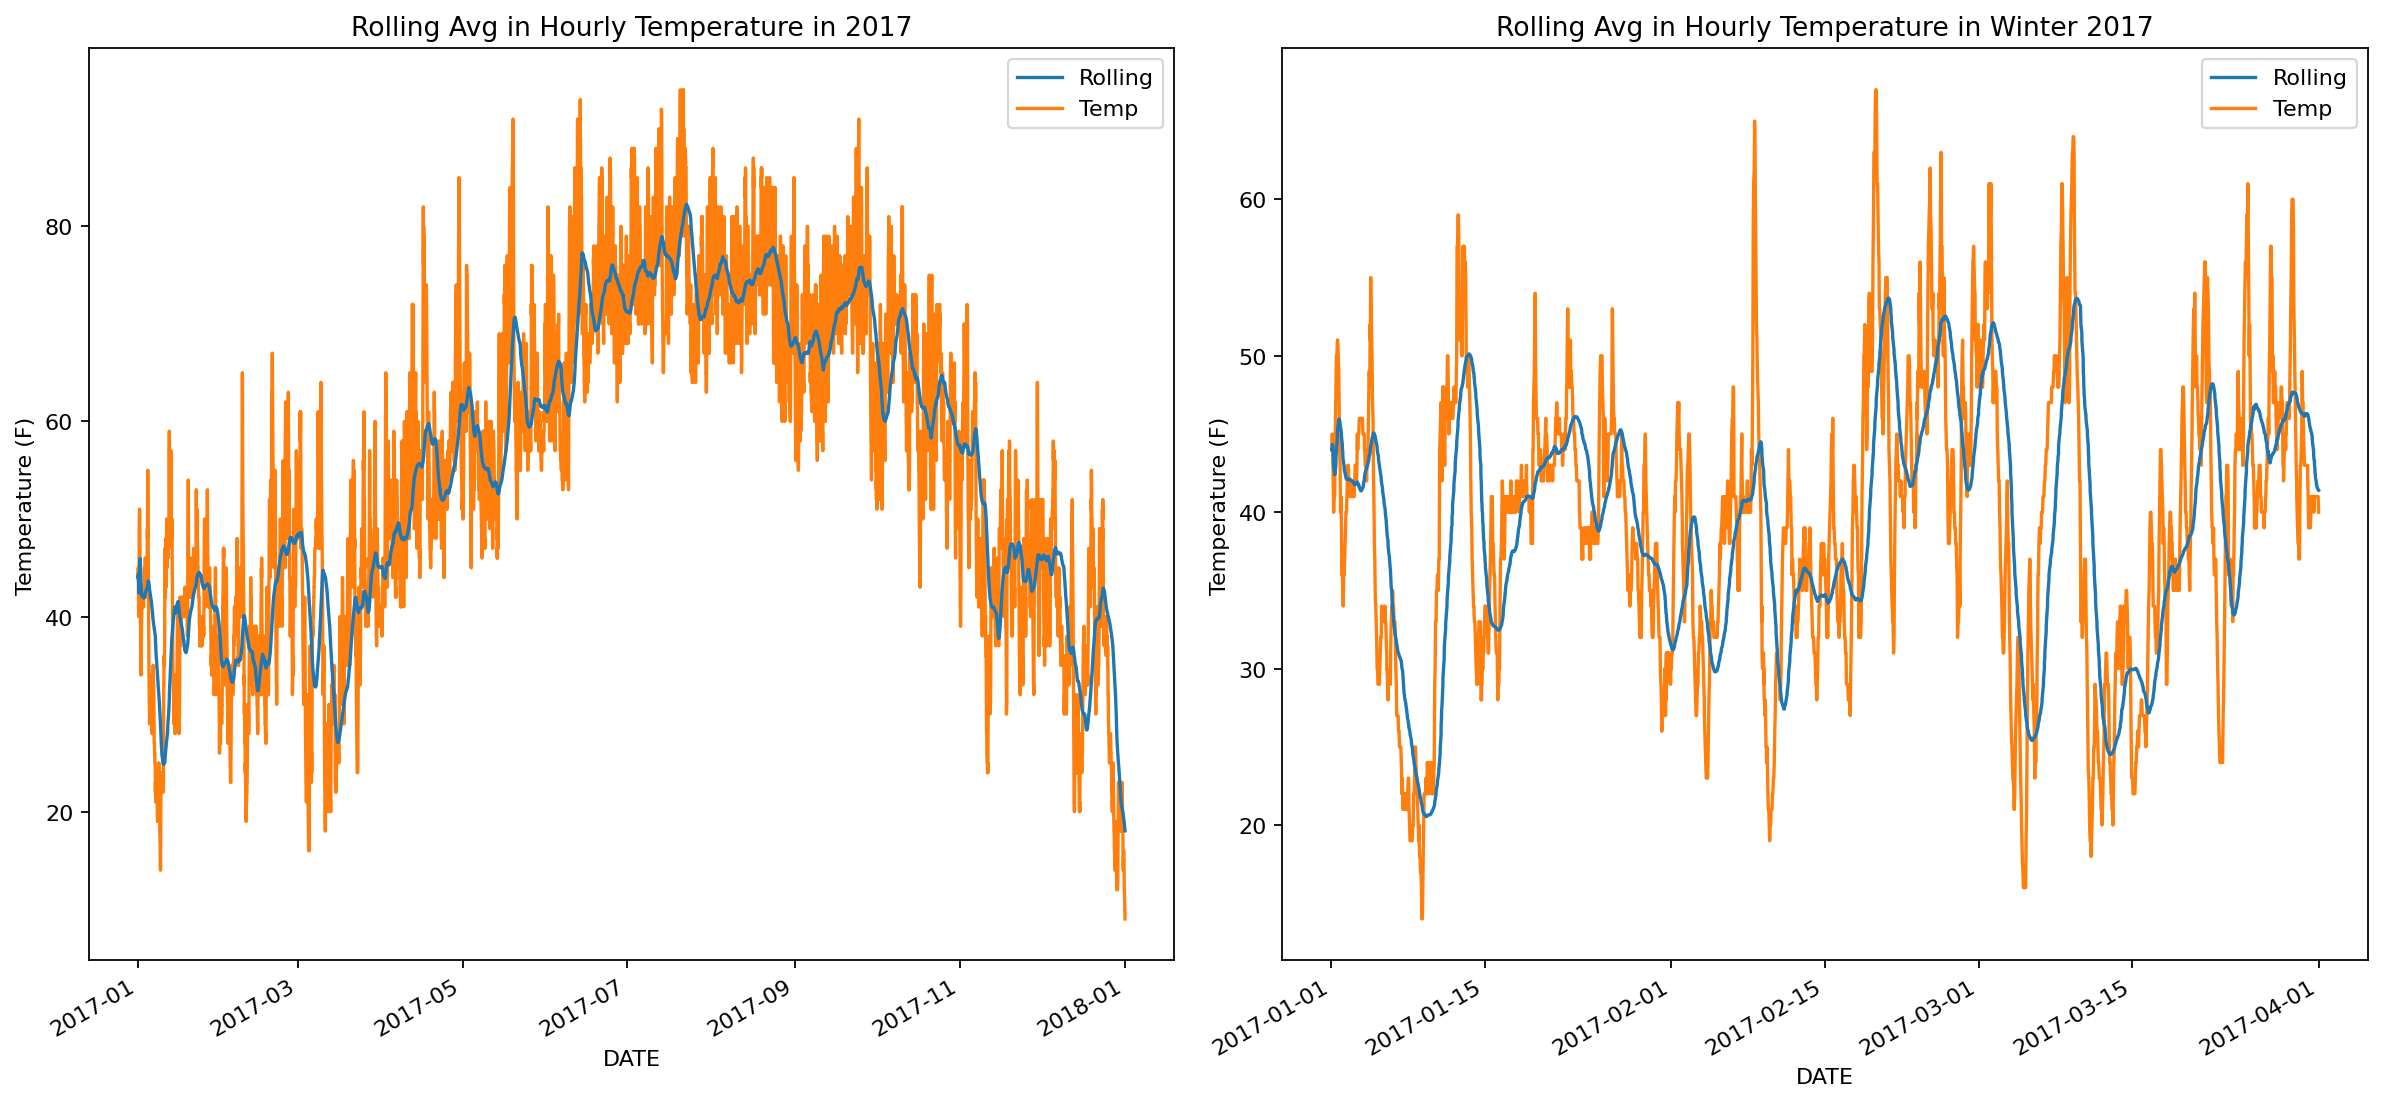

In [43]:
plt.figure(figsize=(15, 7))

# Plot rolling mean of temperature 
plt.subplot(1, 2, 1)
data.loc['2017', TEMP_COL].rolling('5D').mean().plot(zorder=2)  # 5-day rolling mean
data.loc['2017', TEMP_COL].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title('Rolling Avg in Hourly Temperature in 2017')
plt.ylabel('Temperature (F)')

# Plot rolling mean of temperature for Jan–Mar 2017
plt.subplot(1, 2, 2)
data.loc['2017-01':'2017-03', TEMP_COL].rolling('2D').mean().plot(zorder=2)  # 2-day rolling mean
data.loc['2017-01':'2017-03', TEMP_COL].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title('Rolling Avg in Hourly Temperature in Winter 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()